<a href="https://colab.research.google.com/github/Darshan-Thakar/Darshan-Thakar/blob/main/CommentsEmotionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required modules

import pandas as pd;
import numpy as np ;
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix ;
from sklearn.metrics import classification_report
import spacy
from sklearn.ensemble import BaggingClassifier;
from sklearn.pipeline import Pipeline

**In this notebook we will try out different classification algorithms to classify comments into their respective emotions . In this commit I will try few algos and text representation techniques such as bag of words , bag of n_grams and TF-Idf. This text representation techniques do not capture the relationship between the words. In the next commit I will use different word embedding techniques as well as BERT for text representation**

In [ ]:
# Let's load the data 
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/12_tf_idf/Emotion_classify_Data.csv");

# I dont want to download the dataset from kaggle so i will load it using raw github csv uploaded on codebasics github page

df.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.shape

(5937, 2)

In [ ]:
# The data set has 5937 rows and 2 columns

# let's check if there is any imbalance in the dataset

print(df.Emotion.value_counts());

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64


**The dataset is balanced so we don't need to apply the techniques to handle imbalanced. So, let's move on converting the labels of the dataset to numerical values**

In [ ]:
df['Emotion']=df['Emotion'].map({
    'anger':0,
    'joy':1,
    'fear':2
    
})

df.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,2
1,im so full of life i feel appalled,0
2,i sit here to write i start to dig out my feel...,2
3,ive been really angry with r and i feel like a...,1
4,i feel suspicious if there is no one outside l...,2


**We have finally converted the labels into numerical values . Let's preprocess the text we will remove punctuations and derive the word into it's base form by applying Lemmatization**

In [ ]:
nlp=spacy.load("en_core_web_sm");
def preprocess(text):
  doc=nlp(text);
  filtered_tokens=[token.lemma_ for token in doc if not token.is_punct and not token.is_stop ];
  return " ".join(filtered_tokens);

**We will apply to our pandas Comment column and will create a new column called preprocesse_comments**

In [ ]:
df['preprocessed_comments']=df.Comment.apply(preprocess);

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df.preprocessed_comments,df.Emotion,test_size=0.2,random_state=2022);

**Building sklearn pipleline and using tfidf as a text representation**

In [ ]:
multinomial_nb=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',MultinomialNB())
])

In [ ]:

multinomial_nb.fit(X_train,Y_train);
y_pred_multinomial_nb=multinomial_nb.predict(X_test);
report_multinomial=classification_report(Y_test,y_pred_multinomial_nb);
print(report_multinomial)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       407
           1       0.93      0.91      0.92       400
           2       0.89      0.93      0.91       381

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     
];


predictions=[];
for i in multinomial_nb.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Joy', 'Anger', 'Anger', 'Anger', 'Joy']


In [ ]:
random_forest=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',RandomForestClassifier(n_estimators=25,criterion='gini'))
        
    
]);
random_forest.fit(X_train,Y_train);
y_pred_forest=random_forest.predict(X_test);
classificaton_report_forest=classification_report(Y_test,y_pred_forest);
print(classificaton_report_forest);


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       407
           1       0.91      0.94      0.93       400
           2       0.94      0.92      0.93       381

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     
];


predictions=[];
for i in random_forest.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Anger', 'Anger', 'Anger', 'Anger', 'Joy']


**As we can see in terms of both precision ,recall and f1-score random forest performs better than multinomial naive_bayes**

***Now let's try SVM(support vector machines) and see how it performs***

In [ ]:
svm=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(kernel='linear',C=0.9))
]);

In [ ]:
svm.fit(X_train,Y_train);
y_pred_svm=svm.predict(X_test);
report_svm=classification_report(Y_test,y_pred_svm);
print(report_svm);

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       407
           1       0.93      0.95      0.94       400
           2       0.94      0.93      0.93       381

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks of holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
     'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
     'I am delighted to have your superior service thank you ',
     
];


predictions=[];
for i in svm.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Joy', 'Anger', 'Anger', 'Anger', 'Joy']


In [ ]:
decisionTree=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=25,random_state=2022))
])

In [ ]:
decisionTree.fit(X_train,Y_train);
y_pred=decisionTree.predict(X_test);
report_decisionTree=classification_report(Y_test,y_pred);
print(report_decisionTree)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       407
           1       0.94      0.95      0.95       400
           2       0.94      0.94      0.94       381

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [ ]:
corpus=[
    'I am frightened a lot what will happen tomorrow i have not completed the assignment . Miss.polly will eat me alive',
    'I have spent a lovely 4 weeks holiday in switzerland . Definitely the best weeks of my life',
    'I am too much frustrated to have your stupid service',
    'I  have hatred for him for his past behaviour with me i hope he dies soon.I get furious when i hear his name',
    'I got my delivery after five weeks the service offered was the most terrible service i have ever seen in my entire life',
    'I am delighted to have your superior service thank you ',
   
];


predictions=[];
for i in decisionTree.predict(corpus):
  if(i==0):
    predictions.append('Anger');
  elif i==1:
    predictions.append('Joy');
  else:
    predictions.append('Fear')    


print(predictions)

['Fear', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger']


**Till now our SVM models performs the best of all the models Note:- I have not tried out many different parameters . But you can use different hyperparameter tuning techniques such randomizedSearchCV, GridSearchCV to find the best parameters**

**Let's have a look at the confusion matrix of our svm model**




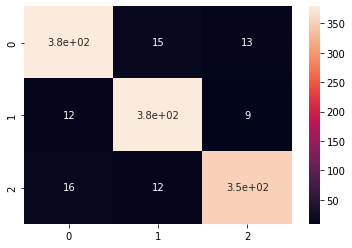

In [ ]:
cm=confusion_matrix(Y_test,y_pred_svm);

sns.heatmap(cm, annot=True)